<a href="https://colab.research.google.com/github/Ercampa2/AulasVisaoComputacional/blob/main/Lecture_02_Image_Filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow # for image display
import os


In [ ]:
!rm *.png* *.zip*
!wget https://github.com/andrehochuli/teaching/raw/main/ComputerVision/Lecture%2002%20-%20Image%20Filtering/Images.zip
!unzip Images.zip

rm: cannot remove '*.png*': No such file or directory
rm: cannot remove '*.zip*': No such file or directory
--2024-08-05 20:10:56--  https://github.com/andrehochuli/teaching/raw/main/ComputerVision/Lecture%2002%20-%20Image%20Filtering/Images.zip
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/andrehochuli/teaching/main/ComputerVision/Lecture%2002%20-%20Image%20Filtering/Images.zip [following]
--2024-08-05 20:10:56--  https://raw.githubusercontent.com/andrehochuli/teaching/main/ComputerVision/Lecture%2002%20-%20Image%20Filtering/Images.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2918590

In [ ]:
import glob
image_list = glob.glob('/content/Images/*.png')
print(image_list)

['/content/Images/a_car_000203.png', '/content/Images/VanGogh - Dinner.png', '/content/Images/LenaNoisy.png', '/content/Images/VanGogh-Sky.png', '/content/Images/a_car_000716.png', '/content/Images/VanGogh-Selfie.png', '/content/Images/mnist_digits_6.png', '/content/Images/mnist_digits_4.png', '/content/Images/b_car_003202.png', '/content/Images/smarties2.png', '/content/Images/a_car_000791.png', '/content/Images/mnist_digits_7.png', '/content/Images/mnist_digits_9.png', '/content/Images/a_car_000863.png', '/content/Images/smarties.png', '/content/Images/mnist_digits_3.png', '/content/Images/a_car_000310.png', '/content/Images/a_car_000393.png', '/content/Images/a_car_000198.png', '/content/Images/BrainNoisy.png', '/content/Images/b_car_003175.png', '/content/Images/a_car_000155.png', '/content/Images/mnist_digits_1.png', '/content/Images/b_car_003043.png', '/content/Images/mnist_digits_5.png', '/content/Images/b_car_003185.png', '/content/Images/mnist_digits_8.png', '/content/Images/b

In [ ]:
#Auxiliary Function to plot side by side
def plot_sidebyside(img_list,titles,colormap=None,figsize=(12,6)):
  n = len(img_list)
  figure, axis = plt.subplots(1, n, figsize=figsize)

  for i in range(n):
    axis[i].imshow(img_list[i], cmap=colormap)
    axis[i].set_title(titles[i])

  # Combine all the operations and display
  plt.show()

#Image Filtering

Image filtering methods are used to smooth noises and enhance image quality.

Take a look at the code below.

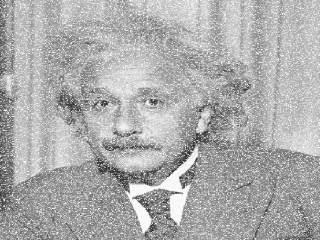

In [ ]:
im_einstein = cv2.imread('/content/Images/EinsteinNoisy.png', cv2.IMREAD_COLOR)
im_einstein = cv2.resize(im_einstein,(320,240))
cv2_imshow(im_einstein)

#Is there a way to smooth the noise ?

Yes! We can use some filters.

In this class, we will approach:
*   Convolution
*   Mean Filter (cv2.blur)
*   Median Filter (cv2.medianBlur)
*   Gaussian Filter (cv2.GaussianBlur)
*   Bilateral Filter (cv2.bilateralFilter)


#Before we start, do you know what convolution means?

 Convolution is the process of sliding a kernel (a.k.a convolution filter) in the entire image, transforming the pixel in the center of the kernel by the weights of its neighbors.

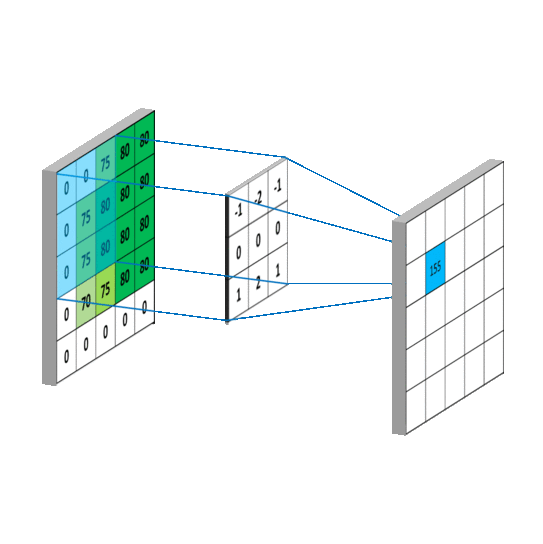




# Mean Filter (cv2.blur)
* Replaces the center pixel with the mean of its neighborhood
* Spreads the outlier value to its neighbors
* Details are smoothed



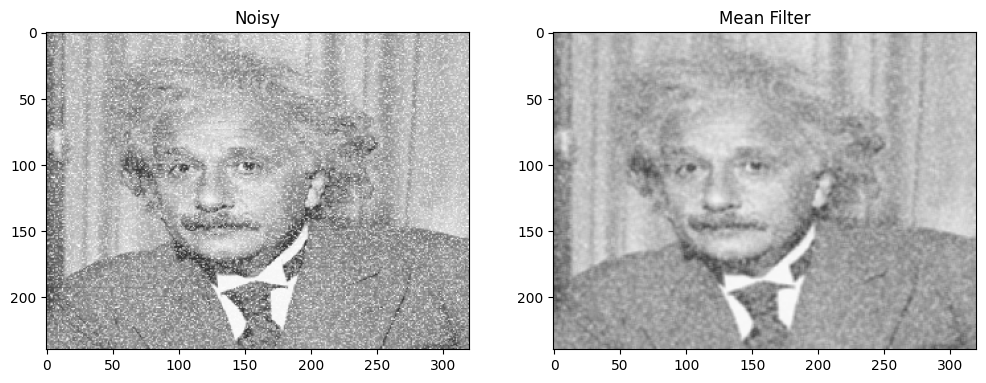

In [ ]:
kernel_size = (3,3)
im_blur = cv2.blur(im_einstein,kernel_size)
plot_sidebyside([im_einstein,im_blur],['Noisy','Mean Filter'],colormap='gray')

#Median Filter (cv2.blur)

*   Replaces the center pixel with by a median of its neighborhood
*   Preserves more details when compared to the mean filter

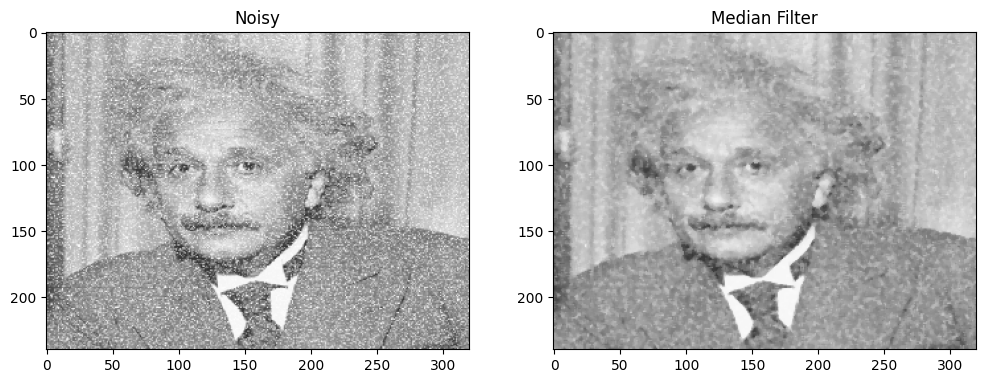

In [ ]:
im_blur = cv2.medianBlur(im_einstein,3)
plot_sidebyside([im_einstein,im_blur],['Noisy','Median Filter'],colormap='gray')

#Gaussian Filter (cv2.GaussianBlur())
* Gaussian distribution of pixels
* The kernel is composed of probabilities
* Weighted Mean
* The standard deviation determines the blur degree

[[0.07511361 0.1238414  0.07511361]
 [0.1238414  0.20417994 0.1238414 ]
 [0.07511361 0.1238414  0.07511361]]


<ipython-input-8-ccd5d583792e>:28: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(kernel_3x3.ravel(), use_line_collection=True)


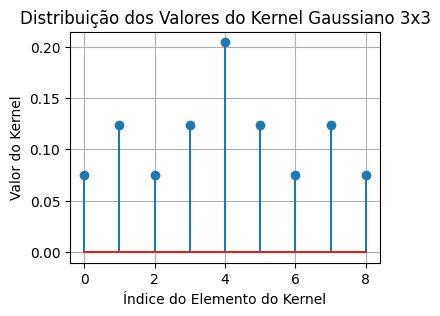

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Definir o kernel gaussiano 3x3
def gaussian_kernel(size, sigma):
    kernel = np.zeros((size, size), dtype=np.float32)
    center = size // 2
    total = 0.0

    for x in range(size):
        for y in range(size):
            exponent = -((x - center) ** 2 + (y - center) ** 2) / (2 * sigma ** 2)
            kernel[x, y] = np.exp(exponent) / (2 * np.pi * sigma ** 2)
            total += kernel[x, y]

    # Normalizar o kernel
    kernel /= total
    return kernel

# Gerar kernel Gaussiano 3x3
kernel_3x3 = gaussian_kernel(3, 1)
print(kernel_3x3)


# Plotar a distribuição dos valores do kernel
plt.figure(figsize=(4,3))
plt.stem(kernel_3x3.ravel(), use_line_collection=True)
plt.title('Distribuição dos Valores do Kernel Gaussiano 3x3')
plt.xlabel('Índice do Elemento do Kernel')
plt.ylabel('Valor do Kernel')
plt.grid(True)
plt.show()

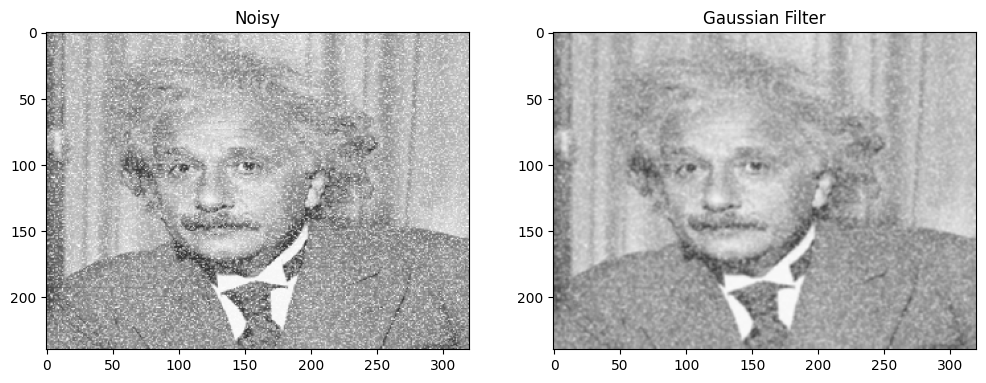

In [ ]:
im_blur = cv2.GaussianBlur(im_einstein,(3,3),0)
plot_sidebyside([im_einstein,im_blur],['Noisy','Gaussian Filter'],colormap='gray')

#Bi-Lateral
* Gaussian Distribution based
* Add Normalization Factors and Range Weight
* Preserve details

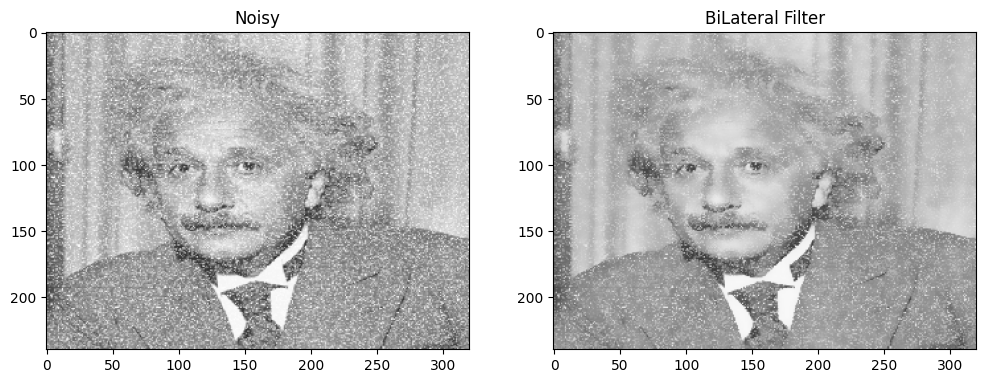

In [ ]:
# Apply bilateral filter with d = 15,
# sigmaColor = sigmaSpace = 75.
im_blur = cv2.bilateralFilter(im_einstein,9,75,75)
plot_sidebyside([im_einstein,im_blur],['Noisy','BiLateral Filter'],colormap='gray')

Now, it's up to you!

Try applying these filters to other images, adjusting the parameters, and so on. Then, experiment with segmenting by threshold function, color, etc.

How does noise impact the results?

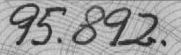

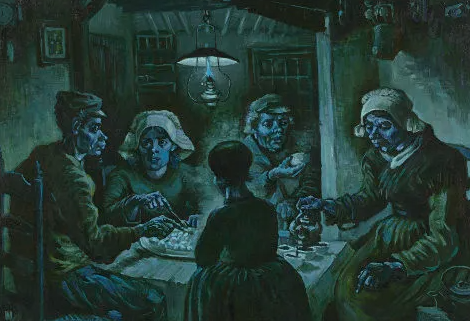

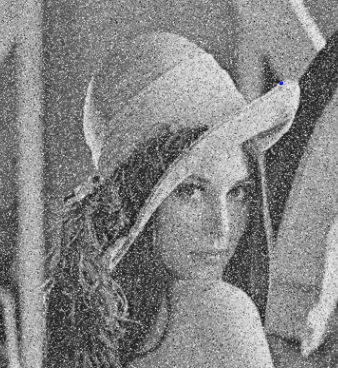

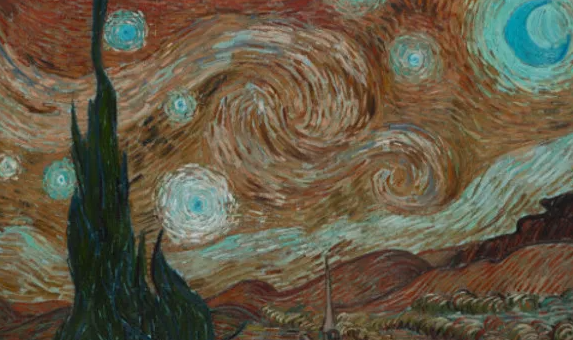

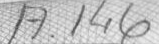

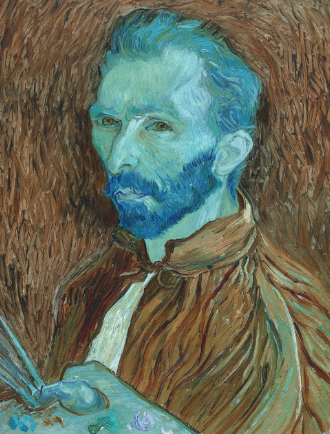

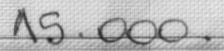

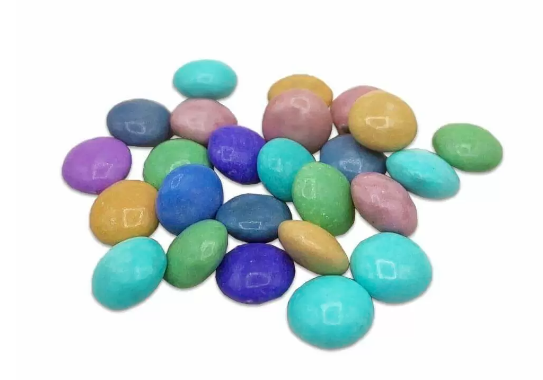

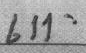

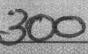

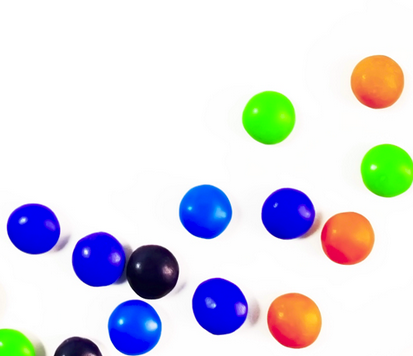

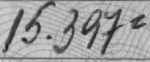

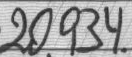

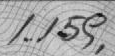

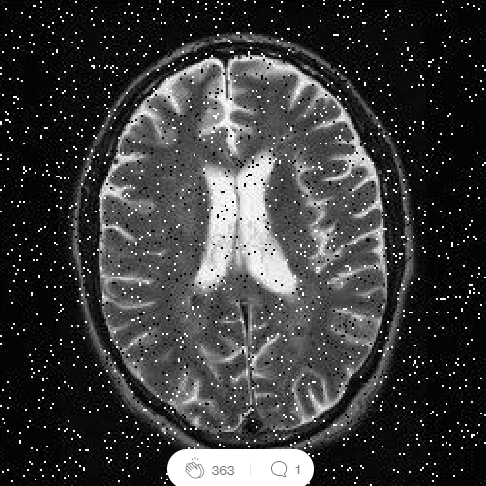

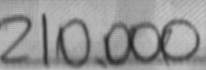

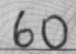

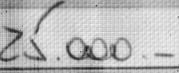

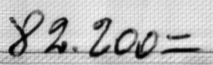

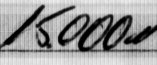

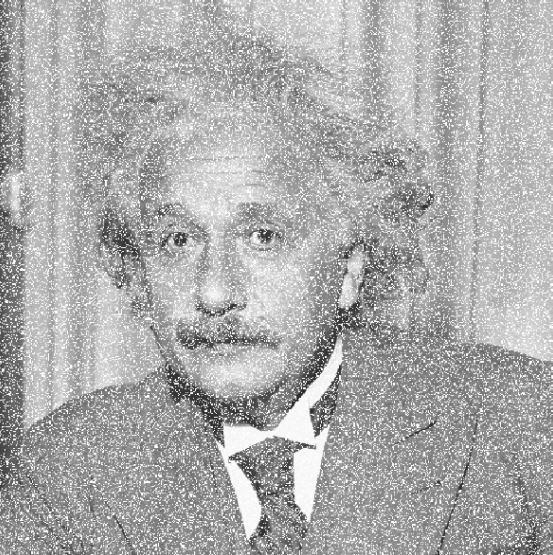

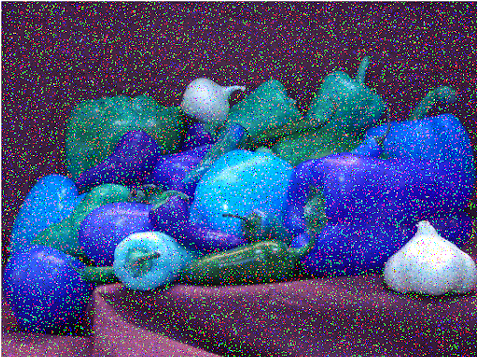

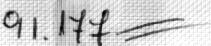

In [ ]:
for im_name in image_list:
  im = cv2.imread(im_name)
  im = cv2.cvtColor(im,cv2.COLOR_RGB2BGR)
  cv2_imshow(im)